<a href="https://colab.research.google.com/github/TPV7/Heartbeatiot/blob/main/CiscoAnalysis_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df= pd.DataFrame()

myAPIKey = 'fb976e3f79865b5cb7ca7056a2f10532'

stock = 'CSCO'
balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()

incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()

print (balanceStatements[:4])
print (df)


[{'date': '2021-07-31', 'symbol': 'CSCO', 'reportedCurrency': 'USD', 'cik': '0000858877', 'fillingDate': '2021-09-09', 'acceptedDate': '2021-09-09 16:39:49', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 9175000000, 'shortTermInvestments': 15343000000, 'cashAndShortTermInvestments': 24518000000, 'netReceivables': 10146000000, 'inventory': 1559000000, 'otherCurrentAssets': 2889000000, 'totalCurrentAssets': 39112000000, 'propertyPlantEquipmentNet': 2338000000, 'goodwill': 38168000000, 'intangibleAssets': 3619000000, 'goodwillAndIntangibleAssets': 41787000000, 'longTermInvestments': 0.0, 'taxAssets': 4360000000, 'otherNonCurrentAssets': 9900000000, 'totalNonCurrentAssets': 58385000000, 'otherAssets': 0.0, 'totalAssets': 97497000000, 'accountPayables': 2362000000, 'shortTermDebt': 2508000000, 'taxPayables': 801000000, 'deferredRevenue': 12148000000, 'otherCurrentLiabilities': 9239000000, 'totalCurrentLiabilities': 26257000000, 'longTermDebt': 9018000000, 'deferredRevenu

In [23]:
twoYearBalanceStatement= balanceStatements[:4]
twoYearIncomeStatement= incomeStatements[:4]

In [24]:
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]
dates=[]


for i in range (0,4):
  dates.append(twoYearBalanceStatement[i]['date'])
  profitabilityValue=twoYearIncomeStatement[i]['netIncome']/twoYearIncomeStatement[i]['revenue'] 
  profitability.append(profitabilityValue)
  assetTurnOverValue=twoYearIncomeStatement[i]['revenue']/twoYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue) 
  capitalStructureValue=twoYearBalanceStatement [i]['totalAssets']/twoYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue=profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

In [25]:
from datetime import date

df = pd.DataFrame(df,columns=['dates','profitability','assetTurnOver','capitalStructure','returnOnEquity'])
df['dates']=dates
df['profitability']=profitability
df['assetTurnOver']=assetTurnOver
df['returnOnEquity']=returnOnEquity
df['capitalStructure']=capitalStructure
print(df)



        dates  profitability  assetTurnOver  capitalStructure  returnOnEquity
0  2021-07-31       0.212594       0.510970          2.362132        0.256596
1  2020-07-25       0.227460       0.519762          2.501398        0.295728
2  2019-07-27       0.223894       0.530754          2.913020        0.346162
3  2018-07-28       0.002230       0.453467          2.517915        0.002546


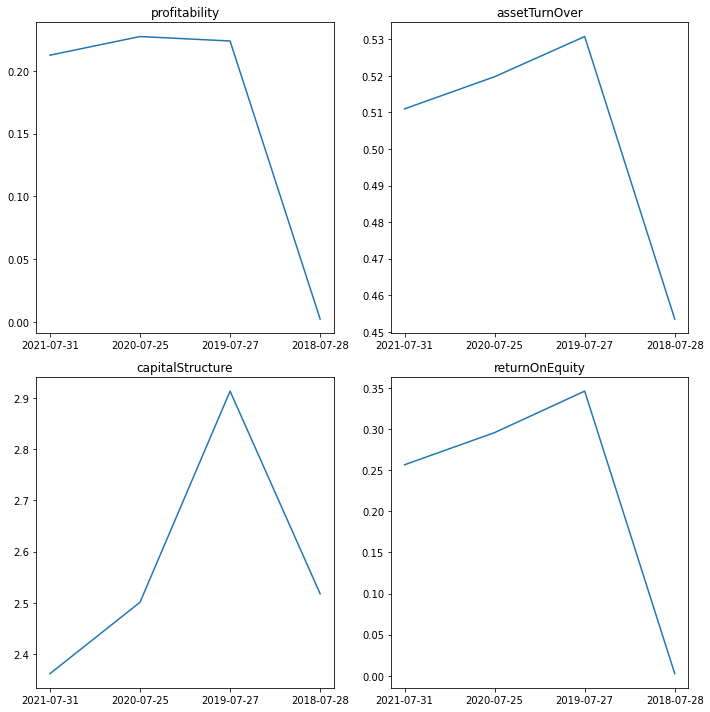

In [26]:
import matplotlib.pyplot as plt
fig, axs= plt.subplots(2,2, figsize=(10,10))
x=df['dates']

axs[0,0].plot(x,df['profitability'])
axs[0,0].set_title('profitability')
axs[0,1].plot(x,df['assetTurnOver'])
axs[0,1].set_title('assetTurnOver')
axs[1,0].plot(x,df['capitalStructure'])
axs[1,0].set_title('capitalStructure')
axs[1,1].plot(x,df['returnOnEquity'])
axs[1,1].set_title('returnOnEquity')
fig.tight_layout()
